In [1]:
#Load libraries
import os
os.chdir("C:/Users/27261/Desktop/prostate/code-0126")

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sdv.metadata import SingleTableMetadata
from matplotlib import pyplot as plt


In [2]:
TRAIN_FILE = 'Dataset_cedric/Train.csv'
HOME_PATH = "Dataset_cedric/SYNTHETIC DATASETS/SDV/"

## 1. Read data

In [3]:
real_data = pd.read_csv(TRAIN_FILE)
categorical_columns = ["cT(MRI)","Multifocaal", "pN", "1c (0) - Perifeer (1) -  Beide (2) - Transitie (3)"]
for col in categorical_columns :
    real_data[col] = real_data[col].astype('category')
data_train = real_data
real_data

,eadnr (I),Age,Multifocaal,1c (0) - Perifeer (1) - Beide (2) - Transitie (3),Preoperatief PSA,Aantal zones positive percentage,Primaire Gleason,Secundaire Gleason,Grade group (highest),Target biopsie Core length (perc),...,Grootste diameter (percentage of tumor),Grootste mm aantasting (mms),Primaire,Secundaire,Grade group Grootste mm aantasting,Primaire Gleason.1,Secundaire Gleason.1,Grade Group,pN,cT(MRI)
0,74911959,60.254795,0,3,1.90,0.300000,3,4,2,20.0,...,20.0,4.0,3,4,2,3,3,1,0,1
1,72364086,66.391781,1,3,4.02,0.300000,4,3,3,8.0,...,87.0,7.0,3,3,1,3,3,1,0,1
2,72845225,69.010959,0,1,4.60,0.250000,4,4,4,17.0,...,17.0,2.0,4,4,4,4,3,3,0,4
3,65384463,41.136986,0,3,5.00,0.666667,3,4,2,46.0,...,46.0,6.0,3,4,2,3,4,2,0,1
4,83257287,74.665753,0,1,10.90,1.000000,4,5,5,100.0,...,100.0,17.0,4,5,5,4,5,5,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,77679900,68.350685,0,1,4.91,0.500000,4,5,5,30.0,...,30.0,4.0,4,4,4,4,3,3,1,4
229,70544747,73.531507,0,1,9.70,1.000000,4,3,3,31.0,...,31.0,4.0,3,4,2,3,4,2,0,4
230,88824362,65.734247,0,1,10.30,1.000000,4,3,3,83.0,...,83.0,10.0,4,3,3,4,3,3,0,4
231,61072681,60.189041,0,1,10.80,0.200000,3,3,1,30.0,...,30.0,4.5,3,3,1,3,3,1,0,4


In [4]:
real_data.dtypes

eadnr (I)                                                                              int64
Age                                                                                  float64
Multifocaal                                                                         category
1c (0) - Perifeer (1) -  Beide (2) - Transitie (3)                                  category
Preoperatief PSA                                                                     float64
Aantal zones positive percentage                                                     float64
Primaire Gleason                                                                       int64
Secundaire Gleason                                                                     int64
Grade group (highest)                                                                  int64
Target biopsie Core length (perc)                                                    float64
Target biopsie Core length (mm)                                       

### 1.1. Create metada

In [5]:
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(real_data)
metadata

{
    "columns": {
        "eadnr (I)": {
            "sdtype": "id"
        },
        "Age": {
            "sdtype": "numerical"
        },
        "Multifocaal": {
            "sdtype": "categorical"
        },
        "1c (0) - Perifeer (1) -  Beide (2) - Transitie (3)": {
            "sdtype": "categorical"
        },
        "Preoperatief PSA": {
            "sdtype": "numerical"
        },
        "Aantal zones positive percentage": {
            "sdtype": "numerical"
        },
        "Primaire Gleason": {
            "sdtype": "categorical"
        },
        "Secundaire Gleason": {
            "sdtype": "categorical"
        },
        "Grade group (highest)": {
            "sdtype": "categorical"
        },
        "Target biopsie Core length (perc)": {
            "sdtype": "numerical"
        },
        "Target biopsie Core length (mm)": {
            "sdtype": "numerical"
        },
        "TargetBiopsie Primaire Gleason": {
            "sdtype": "categorical"
        }

## 2. Train the model and generate data

In [6]:
from sdv.lite import SingleTablePreset

FML = SingleTablePreset(
    metadata,
    name='FAST_ML'
)

FML.fit(
    data= real_data
)

In [7]:
from sdv.single_table import GaussianCopulaSynthesizer
GCS = GaussianCopulaSynthesizer(
    metadata, # required
    enforce_min_max_values=True,
    enforce_rounding=True
)

GCS.fit(
    data=real_data
)

In [8]:
from sdv.single_table import CTGANSynthesizer
# Cannot interpret 'CategoricalDtype(categories=[0, 1], ordered=False)' as a data type
# stored as an 'object' or "int64"
real_data["pN"] = real_data["pN"].astype('object')
real_data["Multifocaal"] = real_data["Multifocaal"].astype('object')
real_data["cT(MRI)"] = real_data["cT(MRI)"].astype('int64')
real_data["1c (0) - Perifeer (1) -  Beide (2) - Transitie (3)"] = real_data["1c (0) - Perifeer (1) -  Beide (2) - Transitie (3)"].astype("int64")

CTGS = CTGANSynthesizer(
    metadata, # required
    enforce_rounding=True,
    epochs=500,
    verbose=True
)

CTGS.fit(
    data=real_data
)

Gen. (-0.11) | Discrim. (-0.19): 100%|██████████| 500/500 [01:05<00:00,  7.69it/s]


In [9]:
from sdv.single_table import TVAESynthesizer
TVAES = TVAESynthesizer(
    metadata, 
    enforce_min_max_values=True,
    enforce_rounding=True,
    epochs=500
)

TVAES.fit(
    data=real_data
)

In [10]:
from sdv.single_table import CopulaGANSynthesizer
CGS = CopulaGANSynthesizer(
    metadata, 
    enforce_min_max_values=True,
    enforce_rounding=True,
    verbose=True
)

CGS.fit(
    data=real_data)

Gen. (-1.58) | Discrim. (0.08): 100%|██████████| 300/300 [00:39<00:00,  7.61it/s] 


In [11]:
num = real_data.shape[0]
synthetic_FML = FML.sample(num_rows=num).round(2)
synthetic_GCS = GCS.sample(num_rows=num).round(2)
synthetic_CTGS = CTGS.sample(num_rows=num).round(2)
synthetic_TVAES = TVAES.sample(num_rows=num).round(2)
synthetic_CGS = CGS.sample(num_rows=num).round(2)

In [12]:
synthetic_FML

,eadnr (I),Age,Multifocaal,1c (0) - Perifeer (1) - Beide (2) - Transitie (3),Preoperatief PSA,Aantal zones positive percentage,Primaire Gleason,Secundaire Gleason,Grade group (highest),Target biopsie Core length (perc),...,Grootste diameter (percentage of tumor),Grootste mm aantasting (mms),Primaire,Secundaire,Grade group Grootste mm aantasting,Primaire Gleason.1,Secundaire Gleason.1,Grade Group,pN,cT(MRI)
0,0,69.64,0,1,27.76,0.64,4,3,3,64.46,...,74.91,8.37,4,3,4,3,4,2,0,4
1,1,73.14,0,3,23.34,0.18,4,5,4,72.79,...,94.31,12.64,4,3,3,4,4,2,0,5
2,2,64.89,0,3,27.91,0.70,3,4,3,70.82,...,82.65,9.42,4,4,1,4,4,3,0,1
3,3,68.33,1,1,24.77,0.50,3,4,2,47.59,...,48.75,3.71,3,4,2,3,4,2,0,4
4,4,67.20,0,1,2.56,0.27,3,3,3,30.45,...,53.02,5.03,3,3,2,4,3,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,228,61.51,0,1,26.19,0.54,3,4,2,76.61,...,78.66,9.99,3,4,2,5,3,2,0,4
229,229,73.29,0,1,1.30,0.70,4,3,2,59.17,...,68.84,8.02,4,4,4,3,3,3,0,4
230,230,69.23,0,3,31.14,1.00,3,4,2,84.80,...,90.13,13.83,3,4,1,3,4,3,0,4
231,231,62.95,0,1,12.58,0.33,4,4,5,40.04,...,50.29,7.72,4,4,4,4,3,1,0,4


In [13]:
synthetic_FML.describe()

,eadnr (I),Age,Preoperatief PSA,Aantal zones positive percentage,Primaire Gleason,Secundaire Gleason,Grade group (highest),Target biopsie Core length (perc),Target biopsie Core length (mm),TargetBiopsie Primaire Gleason,...,secundaire gleason (check collinearity),Grade group meest voorkomende graad,Grootste diameter (percentage of tumor),Grootste mm aantasting (mms),Primaire,Secundaire,Grade group Grootste mm aantasting,Primaire Gleason.1,Secundaire Gleason.1,Grade Group
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,...,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000
mean,116.000000,64.502446,14.427167,0.617296,3.678112,3.759657,3.000000,64.982661,8.369785,3.635193,...,3.815451,2.575107,69.448670,9.142489,3.587983,3.712446,2.725322,3.467811,3.866953,2.493562
std,67.405489,6.020506,11.966196,0.260196,0.611874,0.651724,1.017095,24.303937,3.611116,0.541356,...,0.591114,1.056457,21.840655,3.626194,0.617442,0.628812,1.186164,0.594546,0.552719,0.947411
min,0.000000,45.990000,1.300000,0.080000,3.000000,3.000000,1.000000,7.000000,1.000000,3.000000,...,3.000000,1.000000,7.000000,1.000000,3.000000,3.000000,1.000000,3.000000,3.000000,1.000000
25%,58.000000,60.580000,1.660000,0.420000,3.000000,3.000000,2.000000,46.900000,5.940000,3.000000,...,3.000000,2.000000,54.190000,6.690000,3.000000,3.000000,2.000000,3.000000,4.000000,2.000000
50%,116.000000,64.890000,12.710000,0.630000,4.000000,4.000000,3.000000,66.640000,8.040000,4.000000,...,4.000000,2.000000,71.890000,8.910000,4.000000,4.000000,2.000000,3.000000,4.000000,2.000000
75%,174.000000,68.700000,23.870000,0.830000,4.000000,4.000000,4.000000,84.800000,10.640000,4.000000,...,4.000000,3.000000,88.040000,11.510000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
max,232.000000,76.150000,50.240000,1.000000,5.000000,5.000000,5.000000,100.000000,17.000000,5.000000,...,5.000000,5.000000,100.000000,17.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


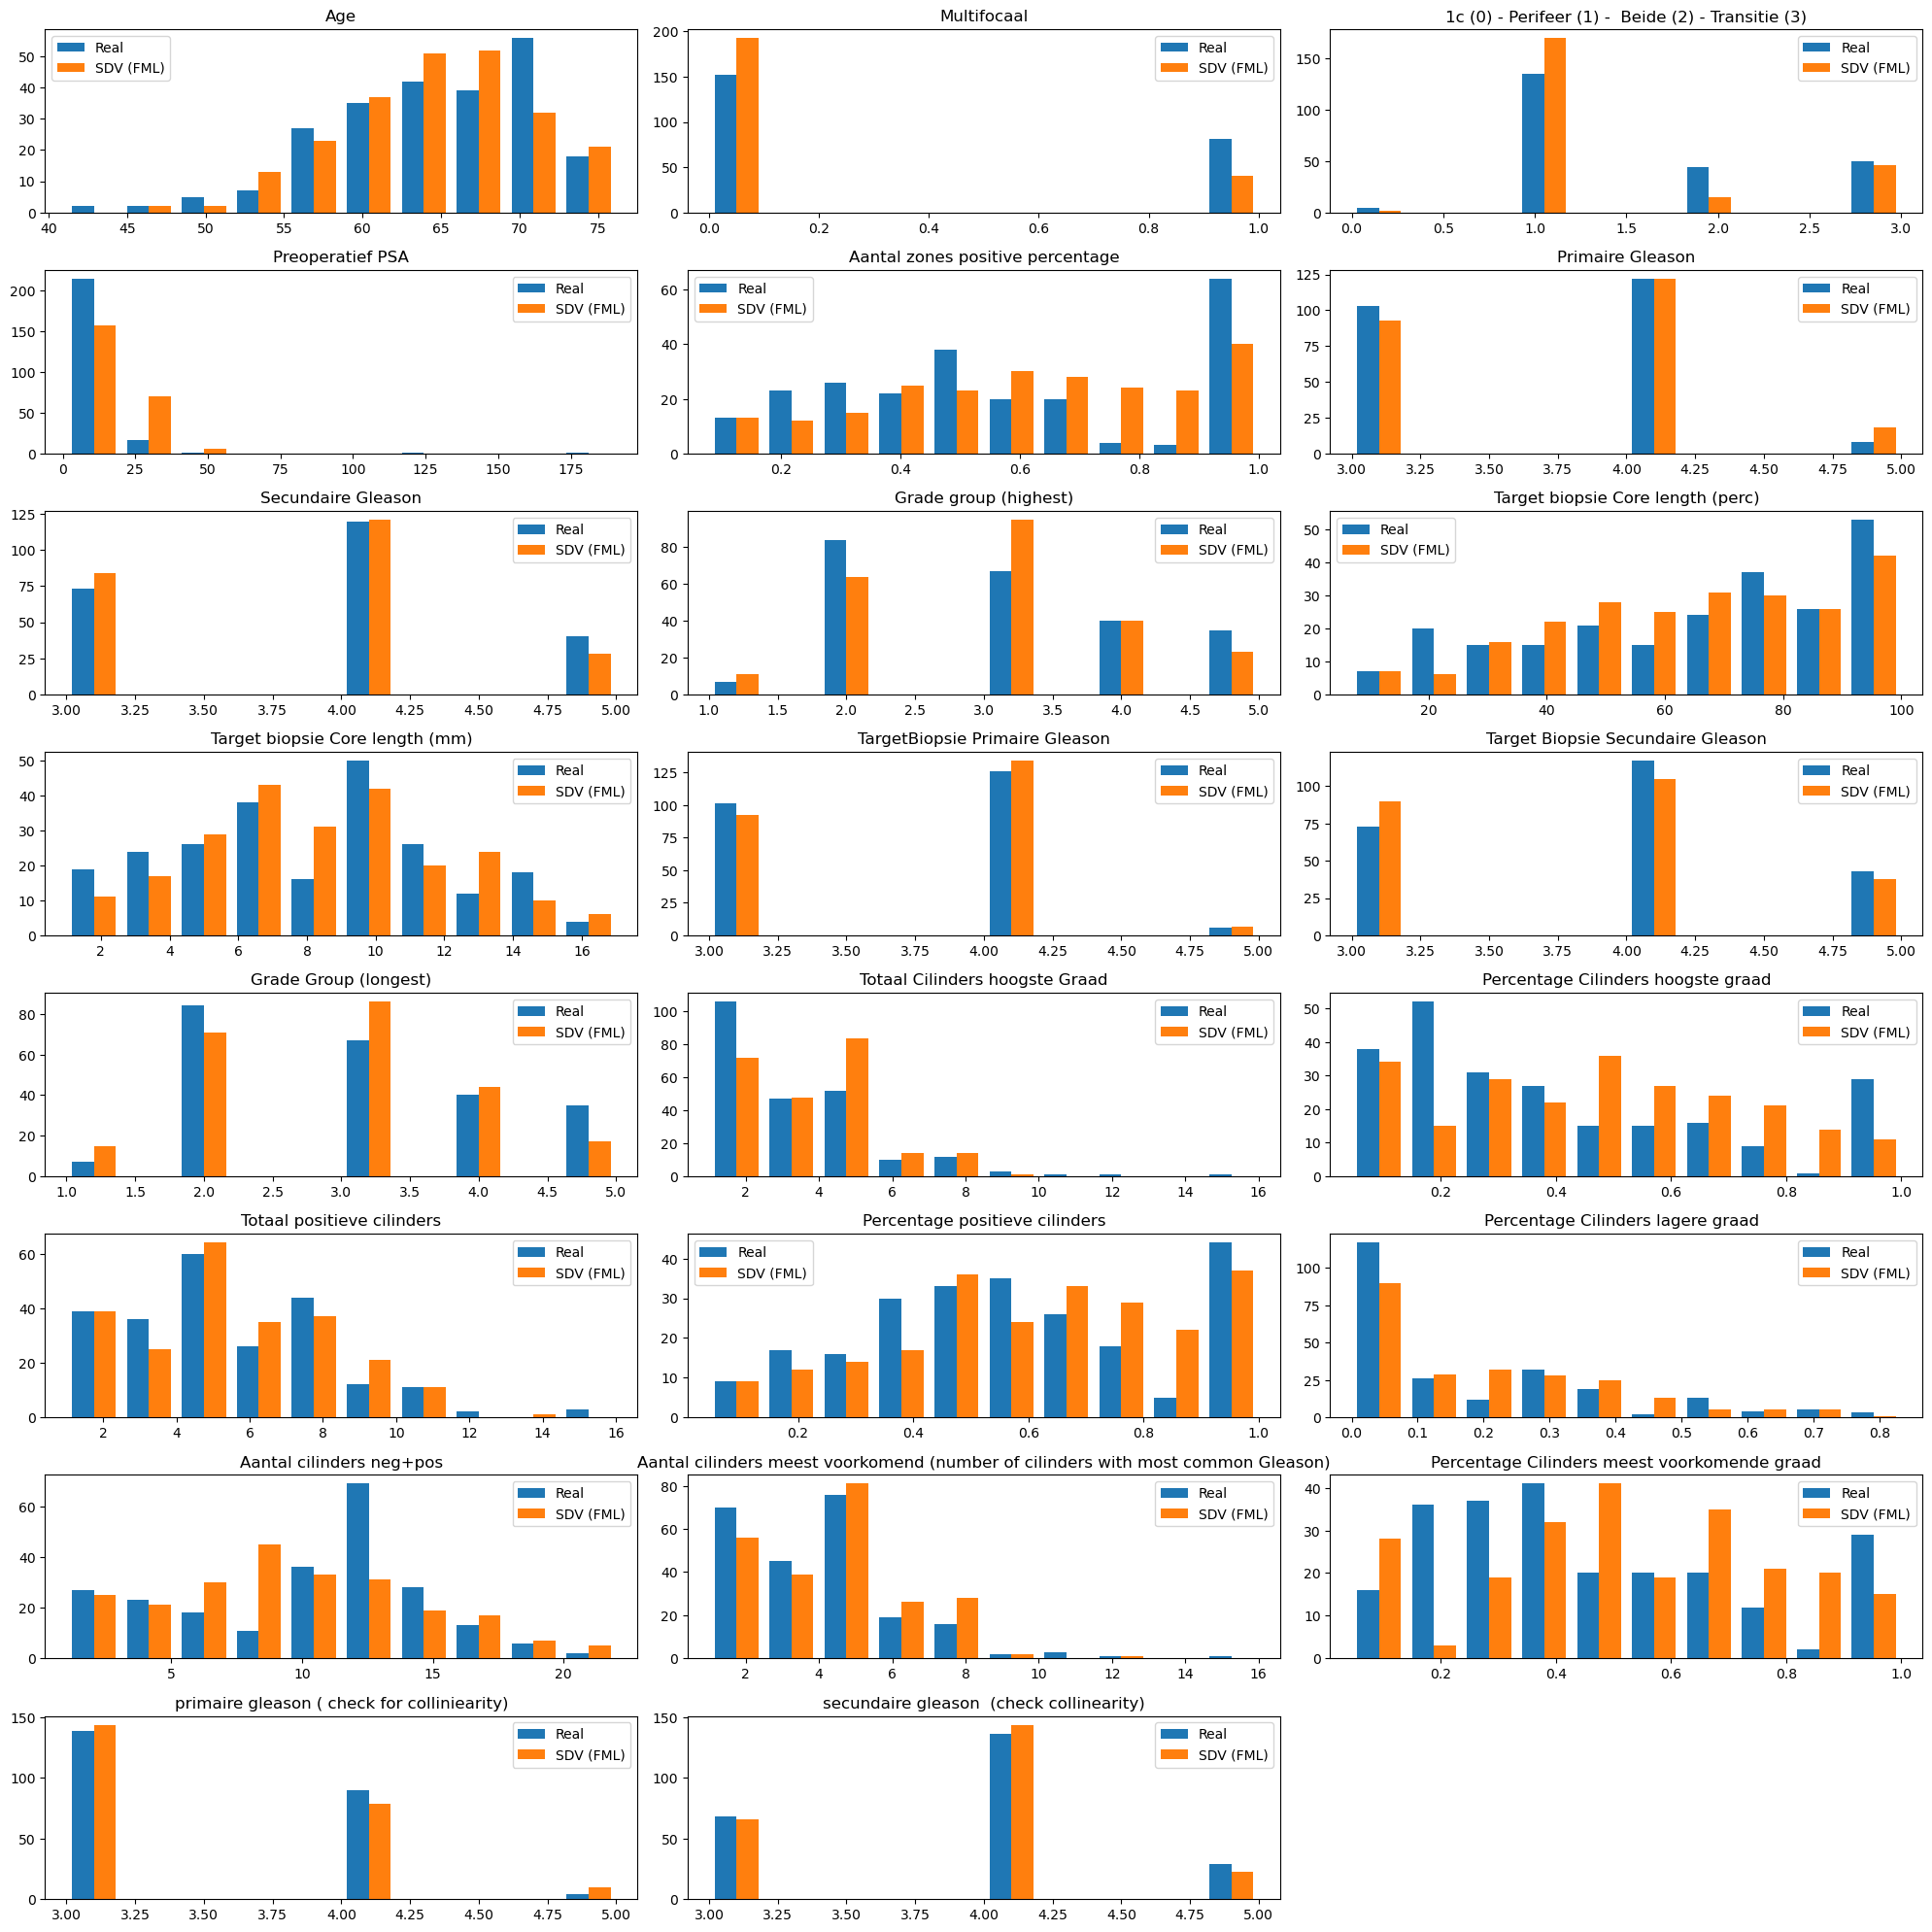

In [14]:
columns = real_data.columns
fig, axs = plt.subplots(nrows=8, ncols=3, figsize=(20,20))
idx = {0:[0,0],1:[0,1], 2:[0,2], 3:[1,0], 4:[1,1], 5:[1,2], 6:[2,0], 7:[2,1], 8:[2,2], 9:[3,0], 10:[3,1], 11:[3,2], 12:[4,0],
      13:[4,1], 14:[4,2], 15:[5,0], 16:[5,1],17:[5,2],18:[6,0],19:[6,1],20:[6,2],21:[7,0],22:[7,1],23:[7,2]}
# for i in range(1,len(columns)) :
#     data = np.column_stack((real_data[columns[i]], synthetic_FML[columns[i]]))
#     axs[idx[i][0], idx[i][1]].hist(data, density=False, histtype='bar', label=['Real','SDV (FML)'])
#     axs[idx[i][0], idx[i][1]].set_title(columns[i])
#     axs[idx[i][0], idx[i][1]].legend()
for i in range(1, len(idx)+1):
    data = np.column_stack((real_data[columns[i]], synthetic_FML[columns[i]]))
    axs[idx[i-1][0], idx[i-1][1]].hist(data, density=False, histtype='bar', label=['Real','SDV (FML)'])
    axs[idx[i-1][0], idx[i-1][1]].set_title(columns[i])
    axs[idx[i-1][0], idx[i-1][1]].legend()

fig.delaxes(axs[7,2])
fig.tight_layout(pad=1.1)

In [17]:
synthetic_FML.to_csv("Dataset_cedric/SYNTHETIC DATASETS/SDV-FML-2.csv", index = False)